In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

> Dataset: https://www.kaggle.com/code/trondataana/alzheimer-prediction-0-853-accuracy

Column Descriptions:
- Group --> Class
- Age --> Age
- EDUC --> Years of Education
- SES --> Socioeconomic Status / 1-5
- MMSE --> Mini Mental State Examination
- CDR --> Clinical Dementia Rating
- eTIV --> Estimated total intracranial volume
- nWBV --> Normalize Whole Brain Volume
- ASF --> Atlas Scaling Factor

In [5]:
df = pd.read_csv("C:/Users/fahee/Documents/DMML/alzheimer.csv")
df.shape

(373, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [7]:
# checking for garbage values 
# Set display options to show more rows and columns (adjust as necessary)
pd.set_option('display.max_rows', 100)  # Adjust the number of rows to display as per your need
pd.set_option('display.max_columns', None)  # Display all columns

# Check for out-of-range values for Age (between 60 and 98)
age_outliers = df[(df['Age'] < 60) | (df['Age'] > 98)]

# Check for out-of-range values for EDUC (between 0 and 23 years)
educ_outliers = df[(df['EDUC'] < 0) | (df['EDUC'] > 23)]

# Check for out-of-range values for MMSE (between 0 and 30, as MMSE scores range between 0 and 30)
mmse_outliers = df[(df['MMSE'] < 0) | (df['MMSE'] > 30)]

# Check for out-of-range values for SES (Socioeconomic status is often between 1 and 5, adjust as per your data)
ses_outliers = df[(df['SES'] < 1) | (df['SES'] > 5)]

# Check for out-of-range values for CDR (Clinical Dementia Rating, values are typically between 0 and 3)
cdr_outliers = df[(df['CDR'] < 0) | (df['CDR'] > 3)]

# Check for unexpected values in categorical columns
unexpected_group_values = df[~df['Group'].isin(['Demented', 'Nondemented'])]
unexpected_gender_values = df[~df['M/F'].isin(['M', 'F'])]

# Verify no outliers or unexpected values
if (age_outliers.empty and educ_outliers.empty and mmse_outliers.empty and ses_outliers.empty and 
    cdr_outliers.empty and unexpected_group_values.empty and unexpected_gender_values.empty):
    print("No garbage values found in the dataset.")
else:
    print("Garbage values detected.")
    
    if not age_outliers.empty:
        print("\n--- Age outliers ---")
        print(age_outliers)
    
    if not educ_outliers.empty:
        print("\n--- Education outliers ---")
        print(educ_outliers)
    
    if not mmse_outliers.empty:
        print("\n--- MMSE outliers ---")
        print(mmse_outliers)

    if not ses_outliers.empty:
        print("\n--- SES outliers ---")
        print(ses_outliers)
    
    if not cdr_outliers.empty:
        print("\n--- CDR outliers ---")
        print(cdr_outliers)
    
    if not unexpected_group_values.empty:
        print("\n--- Unexpected values in Group ---")
        print(unexpected_group_values)
    
    if not unexpected_gender_values.empty:
        print("\n--- Unexpected values in Gender ---")
        print(unexpected_gender_values)


,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [8]:
# Count the number of missing values per column
missing_values_per_column = df.isnull().sum()
print("Missing values per column:")
print(missing_values_per_column)


C:\Users\tshar\AppData\Local\Temp\ipykernel_38480\1684849936.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Group"] = df["Group"].map({"Nondemented": 0, "Demented": 1, "Converted": 2})
C:\Users\tshar\AppData\Local\Temp\ipykernel_38480\1684849936.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["M/F"] = df["M/F"].map({"M": 0, "F": 1})


In [86]:
# Remove rows with any missing values
df = df.dropna()
# Optional: Check the result
print(df)


           Group M/F  Age  EDUC  SES  MMSE  CDR  eTIV   nWBV    ASF
0    Nondemented   M   87    14  2.0  27.0  0.0  1987  0.696  0.883
1    Nondemented   M   88    14  2.0  30.0  0.0  2004  0.681  0.876
5    Nondemented   F   88    18  3.0  28.0  0.0  1215  0.710  1.444
6    Nondemented   F   90    18  3.0  27.0  0.0  1200  0.718  1.462
7    Nondemented   M   80    12  4.0  28.0  0.0  1689  0.712  1.039
..           ...  ..  ...   ...  ...   ...  ...   ...    ...    ...
368     Demented   M   82    16  1.0  28.0  0.5  1693  0.694  1.037
369     Demented   M   86    16  1.0  26.0  0.5  1688  0.675  1.040
370  Nondemented   F   61    13  2.0  30.0  0.0  1319  0.801  1.331
371  Nondemented   F   63    13  2.0  30.0  0.0  1327  0.796  1.323
372  Nondemented   F   65    13  2.0  30.0  0.0  1333  0.801  1.317

[354 rows x 10 columns]


In [87]:
# Convert group to numerical values
df["Group"] = df["Group"].map({"Nondemented": 0, "Demented": 1, "Converted": 2})

# Convert gender to numerical values
df["M/F"] = df["M/F"].map({"M": 0, "F": 1})
df

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,0,1,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,0,1,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,0,0,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,1,0,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,1,0,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,0,1,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,0,1,63,13,2.0,30.0,0.0,1327,0.796,1.323


<Axes: xlabel='ASF', ylabel='Count'>

<Figure size 1000x600 with 0 Axes>

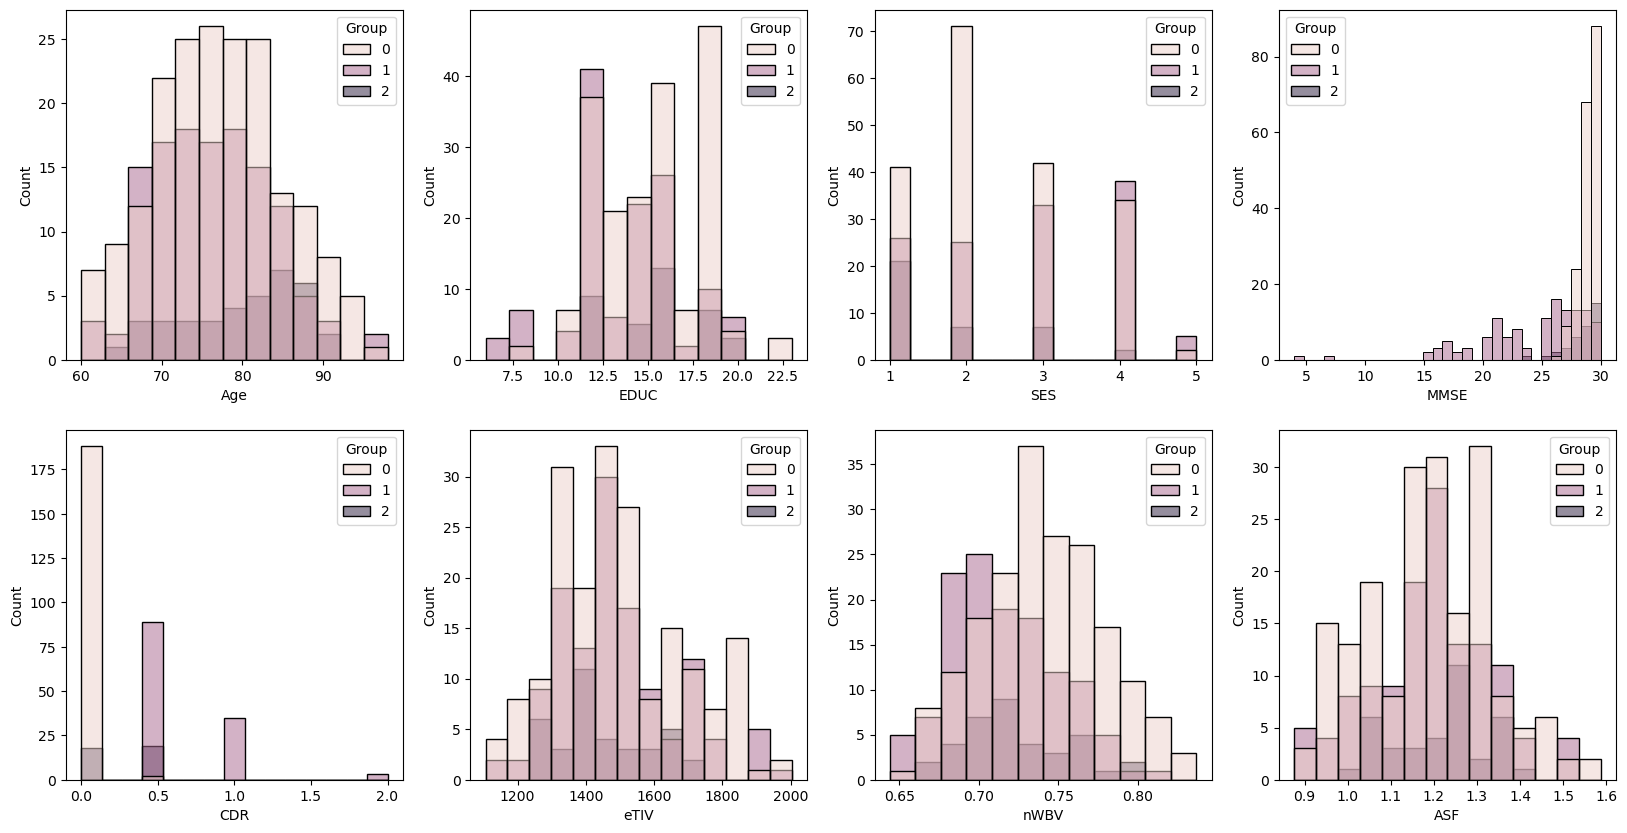

In [9]:
# Histogram distribution with groups
plt.figure(figsize=(10, 6))
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
sns.histplot(data=df, x='Age', hue='Group', ax=axs[0, 0])
sns.histplot(data=df, x='EDUC', hue='Group', ax=axs[0, 1])
sns.histplot(data=df, x='SES', hue='Group', ax=axs[0, 2])
sns.histplot(data=df, x='MMSE', hue='Group', ax=axs[0, 3])
sns.histplot(data=df, x='CDR', hue='Group', ax=axs[1, 0])
sns.histplot(data=df, x='eTIV', hue='Group', ax=axs[1, 1])
sns.histplot(data=df, x='nWBV', hue='Group', ax=axs[1, 2])
sns.histplot(data=df, x='ASF', hue='Group', ax=axs[1, 3])

- **Age:** Converted individuals (Group 2) tend to be older, while non-dementia (Group 0) are younger, with dementia (Group 1) spread mostly between 75-85 years.
- **Education (EDUC):** Non-dementia individuals have higher education (15-20 years), while dementia and converted individuals have lower education (12-15 years).
- **Socioeconomic Status (SES):** Non-dementia individuals have higher SES, while dementia and converted individuals are concentrated in lower SES.
- **MMSE:** Non-dementia individuals score higher (25-30), dementia individuals show a wider range, and converted individuals show scores between 20-30.
- **CDR:** Non-dementia individuals have CDR at 0, while dementia and converted individuals have values between 0.5-2.
- **eTIV:** Individuals with dementia tend to have lower eTIV values compared to non-demented individuals, but there is some overlap between some groups.
- **nWBV:** Non-dementia individuals have higher nWBV (>0.7), while dementia and converted individuals have lower values.
- **ASF:** ASF is evenly distributed across all groups with minimal variation with some overlap at the extremes.


<Figure size 1000x800 with 0 Axes>

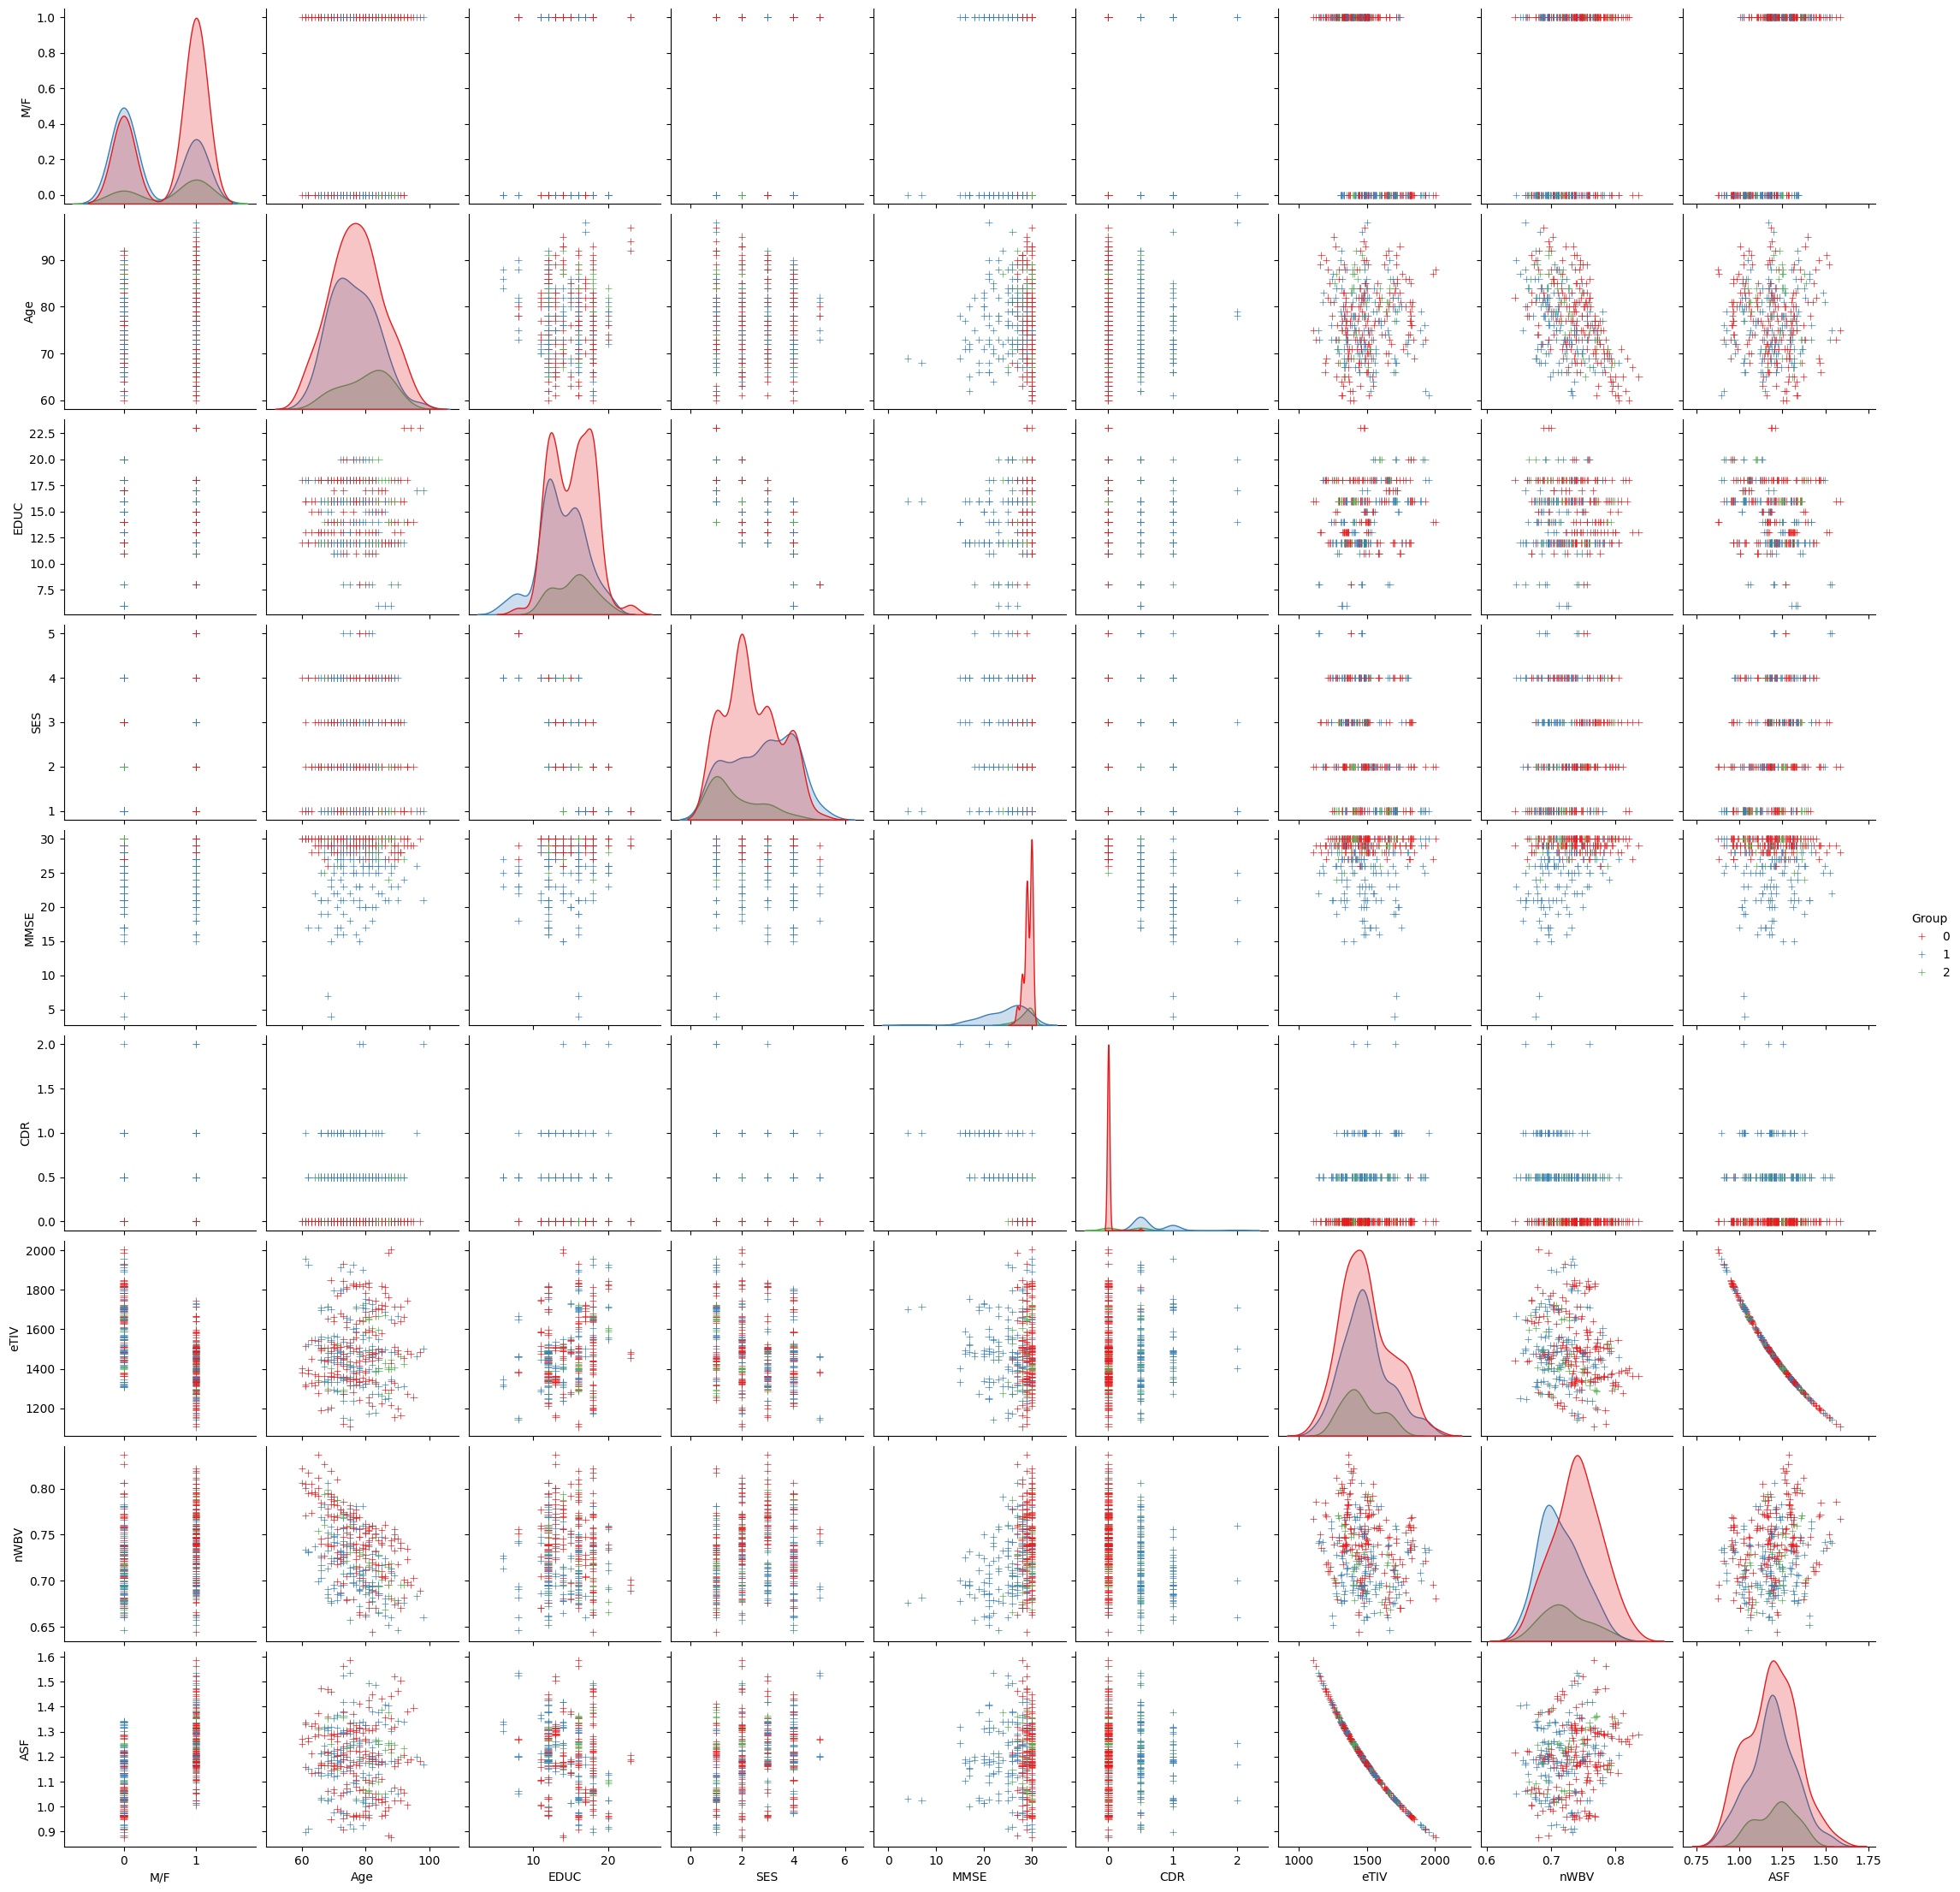

In [15]:
#pairplot
fig = plt.figure(figsize=(12, 10))  # Increase figure size
sns.pairplot(data=df, hue="Group", markers=["o", "s", "D"])

sns.pairplot(data=df, hue="Group", markers=["+", "+", "+"], palette="Set1")

We can see clear seperations in CDR and MMSE

<Axes: xlabel='M/F', ylabel='ASF'>

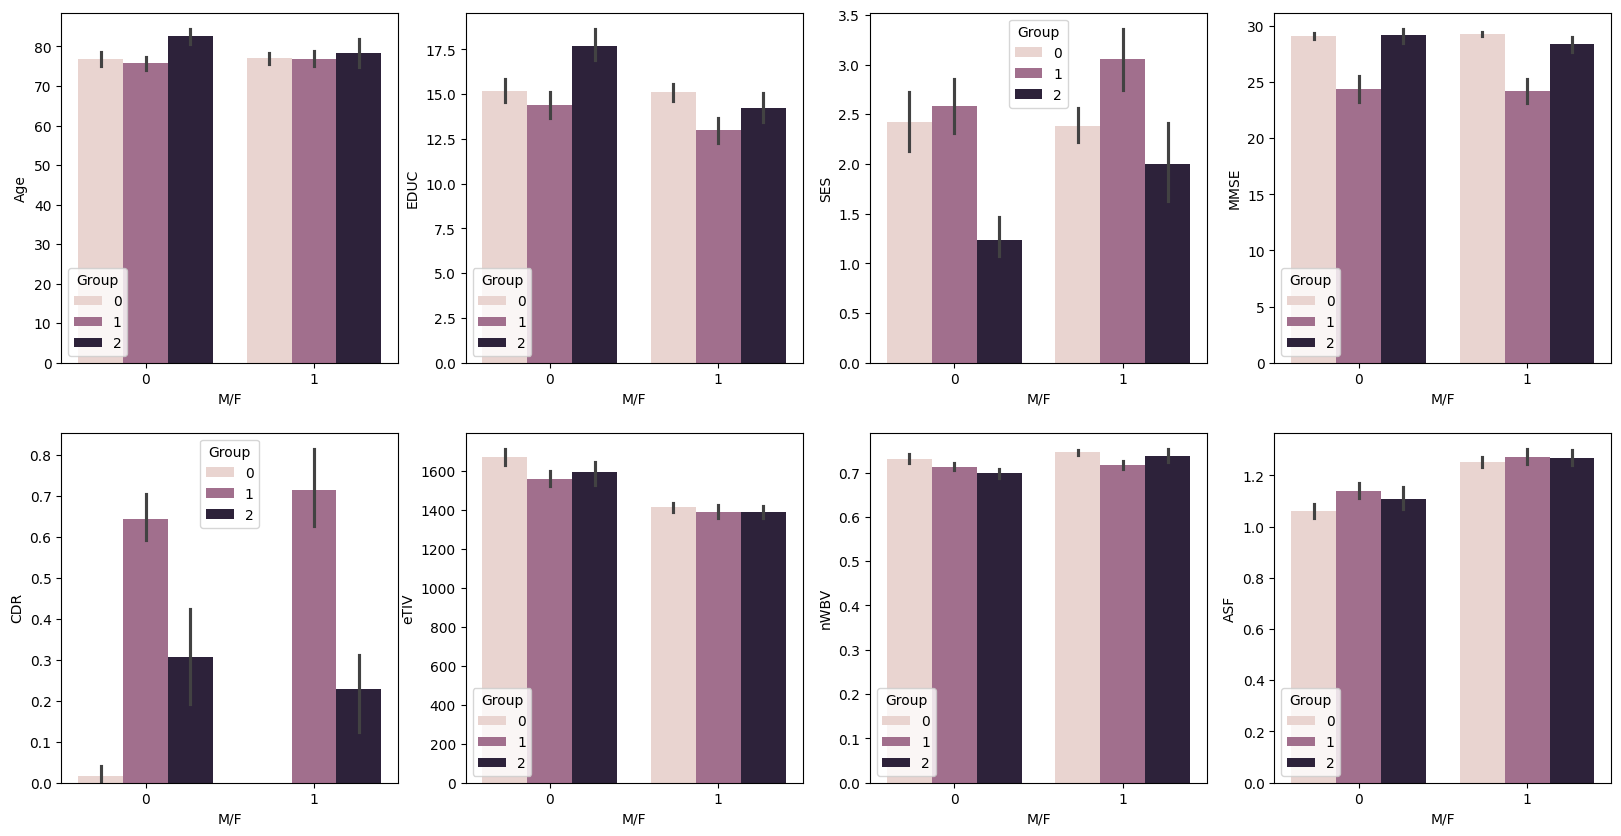

In [13]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
sns.barplot(data=df, x='M/F', y='Age', hue='Group', ax=axs[0, 0])
sns.barplot(data=df, x='M/F', y='EDUC', hue='Group', ax=axs[0, 1])
sns.barplot(data=df, x='M/F', y='SES', hue='Group', ax=axs[0, 2])
sns.barplot(data=df, x='M/F', y='MMSE', hue='Group', ax=axs[0, 3])
sns.barplot(data=df, x='M/F', y='CDR', hue='Group', ax=axs[1, 0])
sns.barplot(data=df, x='M/F', y='eTIV', hue='Group', ax=axs[1, 1])
sns.barplot(data=df, x='M/F', y='nWBV', hue='Group', ax=axs[1, 2])
sns.barplot(data=df, x='M/F', y='ASF', hue='Group', ax=axs[1, 3])

- **Age:** Non-dementia (0) individuals are slightly older, while dementia (1) and converted (2) individuals are generally younger, with minimal gender differences. (ratio is not heavily skewed)
- **Education:** Non-dementia (0) individuals have higher education, especially in males.
- **SES:** dementia (1) individuals have higher SES; converted (2) males show the lowest SES.
- **MMSE:** Non-dementia (0) individuals score highest, with dementia (1) and converted (2) groups showing lower scores but converted is higher than dementia
- **CDR:** Dementia (1) and converted (2) individuals have higher CDR scores, with the highest seen in dementia (1).
- **eTIV:** Slightly lower in dementia (1) and converted (2) groups, with minimal gender differences.
- **nWBV:** Non-dementia (0) individuals have higher brain volume across genders.
- **ASF:** ASF is consistent across dementia and non-dementia between genders.


# PCA

In [ ]:
scaler = StandardScaler()